# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


613

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:


# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Kawalu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=kawalu
Processing Record 2 | Jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=jamestown
Processing Record 3 | Faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=faya
Processing Record 4 | Kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=kapaa
Processing Record 5 | Tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=tiksi
Processing Record 6 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=rikitea
Processing Record 7 | Yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d

Processing Record 57 | Taoudenni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=taoudenni
Processing Record 58 | Albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=albany
Processing Record 59 | Mhango
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=mhango
Processing Record 60 | Bara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=bara
Processing Record 61 | Petropavlovsk-Kamchatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=petropavlovsk-kamchatskiy
Processing Record 62 | Rathdrum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=rathdrum
Processing Record 63 | Te Anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd

Processing Record 112 | Palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=palmer
Processing Record 113 | Laas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=lasa
Processing Record 114 | Lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=lagoa
Processing Record 115 | Río Gallegos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=rio%20gallegos
Processing Record 116 | Khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=khatanga
Processing Record 117 | Villa Corzo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=villa%20corzo
Processing Record 118 | Hammerfest
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b

Processing Record 167 | Skjervøy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=skjervoy
Processing Record 168 | Denpasar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=denpasar
Processing Record 169 | Port Lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=port%20lincoln
Processing Record 170 | Muli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=muli
Processing Record 171 | East London
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=east%20london
Processing Record 172 | Ust-Nera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=ust-nera
Processing Record 173 | Arvika
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981b

Processing Record 223 | Dingle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=dingle
Processing Record 224 | Tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=tasiilaq
Processing Record 225 | Kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=kavaratti
Processing Record 226 | Manuk Mangkaw
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=manuk%20mangkaw
Processing Record 227 | Talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=talnakh
City not found. Skipping...
Processing Record 228 | Valverde del Camino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=valverde%20del%20camino
Processing Record 229 | Faanui
http://api.openweathermap.org/data/2.

Processing Record 278 | Paka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=paka
Processing Record 279 | Bundaberg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=bundaberg
Processing Record 280 | Puerto Nariño
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=puerto%20narino
Processing Record 281 | Tevaitoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=tevaitoa
Processing Record 282 | Yangi Marg`ilon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=komsomolskiy
Processing Record 283 | Vostok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=vostok
Processing Record 284 | Aktash
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd9

Processing Record 334 | Pemangkat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=pemangkat
Processing Record 335 | Bilibino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=bilibino
Processing Record 336 | Muisne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=muisne
Processing Record 337 | Baracoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=baracoa
Processing Record 338 | Kamenka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=kamenka
Processing Record 339 | Chisec
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=chisec
Processing Record 340 | Mount Gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q

Processing Record 390 | Pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=pevek
Processing Record 391 | Sigli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=sigli
Processing Record 392 | Nemuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=nemuro
Processing Record 393 | Rocha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=rocha
Processing Record 394 | Klaksvík
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=klaksvik
City not found. Skipping...
Processing Record 395 | Buraidah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=buraydah
Processing Record 396 | Tutóia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f

Processing Record 446 | Aden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=aden
Processing Record 447 | Ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=ilulissat
Processing Record 448 | Plessisville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=plessisville
City not found. Skipping...
Processing Record 449 | Bud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=bud
Processing Record 450 | Bagn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=bagn
Processing Record 451 | Magole
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=magole
Processing Record 452 | Trat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f

Processing Record 502 | Kirakira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=kirakira
Processing Record 503 | Lalibela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=lalibela
Processing Record 504 | Broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=broome
Processing Record 505 | Luang Prabang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=luang%20prabang
Processing Record 506 | Omboué
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=omboue
Processing Record 507 | Pueblo Viejo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=pueblo%20viejo
Processing Record 508 | Nevel'sk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272c

Processing Record 559 | Sittwe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=akyab
Processing Record 560 | Kabanjahe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=kabanjahe
Processing Record 561 | Margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=margate
Processing Record 562 | Vale da Amoreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=vale%20da%20amoreira


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
output_data_file = "output_data/cities.csv"
# Save data frame to .y with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          562
Cloudiness    562
Country       562
Date          562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Wind Speed    562
dtype: int64

In [5]:


# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kawalu,53,ID,1622165635,75,-7.3817,108.2082,81.12,2.42
1,Jamestown,1,US,1622165573,66,42.0970,-79.2353,56.52,4.61
2,Faya,8,SA,1622165638,23,18.3851,42.4509,66.31,5.30
3,Kapaa,20,US,1622165639,69,22.0752,-159.3190,84.18,3.00
4,Tiksi,100,RU,1622165641,88,71.6872,128.8694,36.19,5.44


In [6]:
weather_data.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,562.000000,5.620000e+02,562.000000,562.000000,562.000000,562.000000,562.000000
mean,55.697509,1.622166e+09,68.604982,19.285723,16.835223,66.227473,7.590445
std,39.516250,5.658473e+02,21.020417,32.404405,89.832746,15.495084,5.591570
min,0.000000,1.622165e+09,8.000000,-54.800000,-179.166700,23.000000,0.000000
25%,12.000000,1.622166e+09,57.000000,-7.292100,-63.139475,54.780000,3.385000
50%,68.000000,1.622166e+09,73.000000,21.266650,20.402700,68.685000,6.095000
75%,98.000000,1.622167e+09,84.000000,46.467275,97.442100,79.200000,10.375000
max,100.000000,1.622167e+09,100.000000,78.218600,178.416700,97.540000,42.930000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weather_data.loc[weather_data.Humidity > 100]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [8]:
#  Get the indices of cities that have humidity over 100%.
weather_data.loc[weather_data.Humidity < 100]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kawalu,53,ID,1622165635,75,-7.3817,108.2082,81.12,2.42
1,Jamestown,1,US,1622165573,66,42.0970,-79.2353,56.52,4.61
2,Faya,8,SA,1622165638,23,18.3851,42.4509,66.31,5.30
3,Kapaa,20,US,1622165639,69,22.0752,-159.3190,84.18,3.00
4,Tiksi,100,RU,1622165641,88,71.6872,128.8694,36.19,5.44
...,...,...,...,...,...,...,...,...,...
557,Yashkul',83,RU,1622167255,80,46.1711,45.3435,64.80,1.83
558,Sittwe,61,MM,1622167001,76,20.1500,92.9000,85.05,9.15
559,Kabanjahe,100,ID,1622167097,81,3.1001,98.4908,68.76,0.74
560,Margate,100,GB,1622167259,80,51.3813,1.3862,51.31,1.99


In [9]:

outlies = weather_data.loc[weather_data.Humidity > 100 ].index

In [10]:
clean_city_data = weather_data.drop(outlies, inplace= False)
clean_city_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kawalu,53,ID,1622165635,75,-7.3817,108.2082,81.12,2.42
1,Jamestown,1,US,1622165573,66,42.0970,-79.2353,56.52,4.61
2,Faya,8,SA,1622165638,23,18.3851,42.4509,66.31,5.30
3,Kapaa,20,US,1622165639,69,22.0752,-159.3190,84.18,3.00
4,Tiksi,100,RU,1622165641,88,71.6872,128.8694,36.19,5.44


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

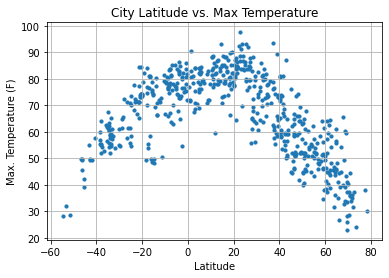

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Show plot
plt.show()


## Latitude vs. Humidity Plot

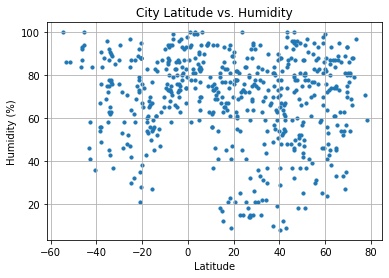

In [13]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

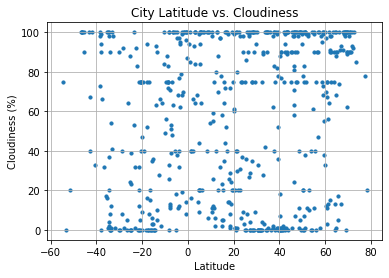

In [14]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)



# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

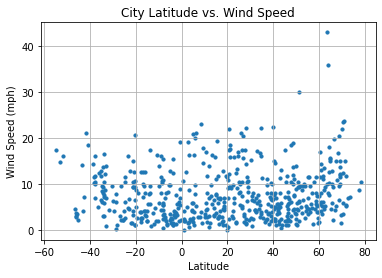

In [15]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)




# Show plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.36254095383833046
The equation of the regression line is: y = -0.76x + 69.5


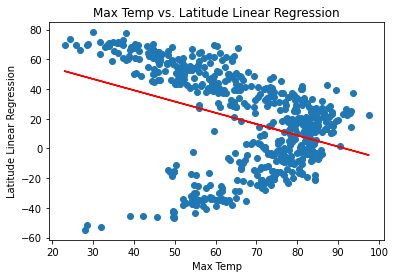

In [16]:
from scipy.stats import linregress
x_values = weather_data["Max Temp"]
                       
y_values = weather_data["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=10,color="red")
plt.title("Max Temp vs. Latitude Linear Regression")
plt.xlabel("Max Temp")
plt.ylabel("Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.36254095383833046
The equation of the regression line is: y = -0.76x + 69.5


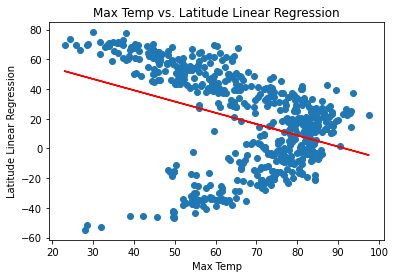

In [17]:
from scipy.stats import linregress
x_values = weather_data["Max Temp"]
                       
y_values = weather_data["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=10,color="red")
plt.title("Max Temp vs. Latitude Linear Regression")
plt.xlabel("Max Temp")
plt.ylabel("Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.09925685430986284
The equation of the regression line is: y = -0.15x + 29.78


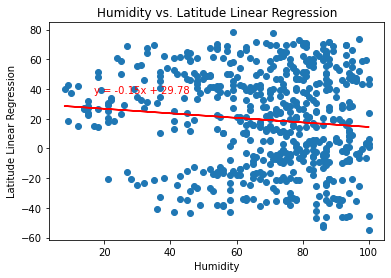

In [18]:
from scipy.stats import linregress
x_values = weather_data["Humidity"]
                       
y_values = weather_data["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=10,color="red")
plt.title("Humidity vs. Latitude Linear Regression")
plt.xlabel("Humidity")
plt.ylabel("Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.09925685430986284
The equation of the regression line is: y = -0.15x + 29.78


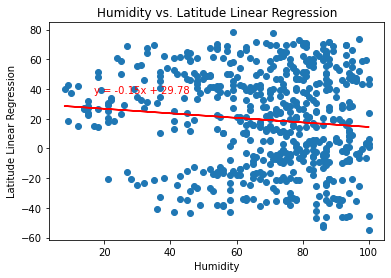

In [19]:
from scipy.stats import linregress
x_values = weather_data["Humidity"]
                       
y_values = weather_data["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=10,color="red")
plt.title("Humidity vs. Latitude Linear Regression")
plt.xlabel("Humidity")
plt.ylabel("Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16646693815704913
The equation of the regression line is: y = 0.14x + 11.68


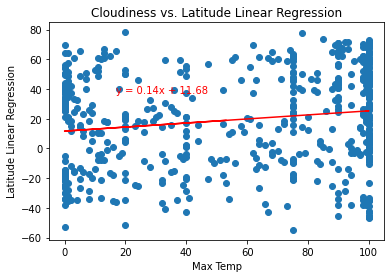

In [20]:
from scipy.stats import linregress
x_values = weather_data["Cloudiness"]
                       
y_values = weather_data["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=10,color="red")
plt.title("Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Max Temp")
plt.ylabel("Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16646693815704913
The equation of the regression line is: y = 0.14x + 11.68


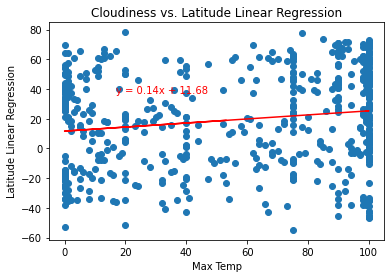

In [21]:
from scipy.stats import linregress
x_values = weather_data["Cloudiness"]
                       
y_values = weather_data["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=10,color="red")
plt.title("Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Max Temp")
plt.ylabel("Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08542206995717526
The equation of the regression line is: y = 0.5x + 15.53


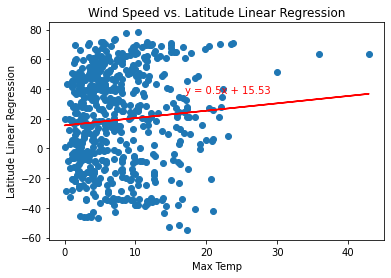

In [22]:
from scipy.stats import linregress
x_values = weather_data["Wind Speed"]
                       
y_values = weather_data["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=10,color="red")
plt.title("Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Max Temp")
plt.ylabel("Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08542206995717526
The equation of the regression line is: y = 0.5x + 15.53


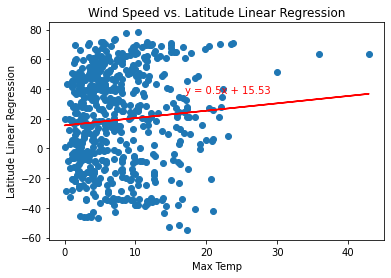

In [23]:
from scipy.stats import linregress
x_values = weather_data["Wind Speed"]
                       
y_values = weather_data["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=10,color="red")
plt.title("Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Max Temp")
plt.ylabel("Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json

# Import API key
from apikeys import g_key

In [25]:
clean_city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kawalu,53,ID,1622165635,75,-7.3817,108.2082,81.12,2.42
1,Jamestown,1,US,1622165573,66,42.0970,-79.2353,56.52,4.61
2,Faya,8,SA,1622165638,23,18.3851,42.4509,66.31,5.30
3,Kapaa,20,US,1622165639,69,22.0752,-159.3190,84.18,3.00
4,Tiksi,100,RU,1622165641,88,71.6872,128.8694,36.19,5.44


In [26]:
# Configure gmaps
gmaps.configure(api_key=g_key)

# Locations
locations = clean_city_data[["Lat", "Lng"]]

humidity = clean_city_data["Humidity"].astype(float)

In [27]:
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=2)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [28]:
vacation_no_cloud = clean_city_data[clean_city_data["Cloudiness"] == 0]
# Filter vacation with max temp above 70 degrees F
vacation_above_70_degrees = vacation_no_cloud[vacation_no_cloud["Max Temp"] > 70]
# Filter vacation with max temp below 80 degrees F
vacation_below_80_degrees = vacation_above_70_degrees[vacation_above_70_degrees["Max Temp"] < 80]
# Filter vacation with wind speed below 10 mph
vacation_slow_wind = vacation_below_80_degrees[vacation_below_80_degrees["Wind Speed"] < 10]
# Filter vacation with humidity below 60 %
perfect_vacation = vacation_slow_wind[vacation_slow_wind["Humidity"] < 60]
# Set Index
indexed_perfect_vacation = perfect_vacation.reset_index()
del indexed_perfect_vacation["index"]
indexed_perfect_vacation

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mackay,0,AU,1622165601,35,-21.1500,149.2000,73.69,9.22
1,Ahvāz,0,IR,1622165756,33,31.3203,48.6693,76.95,2.30
2,Caloundra,0,AU,1622165824,48,-26.8000,153.1333,71.37,3.00
3,Ardakān,0,IR,1622165833,22,32.3100,54.0175,71.98,4.34
4,Jalu,0,LY,1622165874,26,29.0331,21.5482,77.34,8.34
5,Bowen,0,AU,1622165931,38,-20.0167,148.2333,73.62,8.72
6,Santa Rosalía,0,MX,1622166033,32,27.3167,-112.2833,79.72,3.04
7,Yangi Marg`ilon,0,UZ,1622166049,37,40.4272,71.7189,72.32,2.30
8,Hervey Bay,0,AU,1622166058,47,-25.2986,152.8535,71.02,4.00
9,Balkanabat,0,TM,1622166077,51,39.5108,54.3671,73.20,3.83


In [29]:
vaca_locations = indexed_perfect_vacation[["Lat", "Lng"]]

vaca_humidity = indexed_perfect_vacation["Humidity"].astype(float)

# Plot Heatmap
vaca_fig = gmaps.figure()

# Create heat layer
vaca_heat_layer = gmaps.heatmap_layer(vaca_locations, weights=vaca_humidity, 
                                 dissipating=False, max_intensity=50,
                                 point_radius=2.5)

# Add layer
vaca_fig.add_layer(vaca_heat_layer)

# Display figure
vaca_fig

Figure(layout=FigureLayout(height='420px'))

In [30]:
# Hotel variable
hotels = []

# Loop through narrowed down dataframe to get nearest hotel
for city in range(len(indexed_perfect_vacation["City"])):

    lat = indexed_perfect_vacation.loc[city]["Lat"]
    lng = indexed_perfect_vacation.loc[city]["Lng"]

    city_coords = f"{lat},{lng}"

    params = {
        "location": city_coords, 
        "types": "lodging",
        "radius": 5000,
        "key": g_key
    }

    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"   

    hotel_request = requests.get(base_url, params=params)
    hotel_response = hotel_request.json()

    try:
        hotels.append(hotel_response["results"][0]["name"])
    except:
        hotels.append("Nearest hotel not found")

# Dataframe with nearest hotel
indexed_perfect_vacation["Nearest Hotel"] = hotels
indexed_perfect_vacation

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Nearest Hotel
0,Mackay,0,AU,1622165601,35,-21.1500,149.2000,73.69,9.22,International Lodge Motel
1,Ahvāz,0,IR,1622165756,33,31.3203,48.6693,76.95,2.30,tashrifat tourism travel agency
2,Caloundra,0,AU,1622165824,48,-26.8000,153.1333,71.37,3.00,Watermark Resort Caloundra
3,Ardakān,0,IR,1622165833,22,32.3100,54.0175,71.98,4.34,Ardakan Hotel
4,Jalu,0,LY,1622165874,26,29.0331,21.5482,77.34,8.34,صاحبة الفخامة
5,Bowen,0,AU,1622165931,38,-20.0167,148.2333,73.62,8.72,Castle Motor Lodge Motel
6,Santa Rosalía,0,MX,1622166033,32,27.3167,-112.2833,79.72,3.04,Hotel Las Casitas Santa Rosalia
7,Yangi Marg`ilon,0,UZ,1622166049,37,40.4272,71.7189,72.32,2.30,Ikathouse
8,Hervey Bay,0,AU,1622166058,47,-25.2986,152.8535,71.02,4.00,Shelly Bay Resort
9,Balkanabat,0,TM,1622166077,51,39.5108,54.3671,73.20,3.83,Nebitchi Hotel


In [31]:
info_box_template = """
<dl>
<dt>Name</dt><dd>{Nearest Hotel}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
hotel_info = [info_box_template.format(**row) for index, row in indexed_perfect_vacation.iterrows()]
locations = indexed_perfect_vacation[["Lat", "Lng"]]

In [32]:
markers = gmaps.marker_layer(locations, info_box_content= [f"Nearest Hotel: {hotel}" for hotel in hotels])
vaca_fig.add_layer(markers)

# Display Map
vaca_fig

Figure(layout=FigureLayout(height='420px'))